<a href="https://colab.research.google.com/github/AndreassOlsson/faceID/blob/main/implementing_deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dependencies

In [ ]:
!pip install deepface

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import tarfile
from fastai.vision.all import get_image_files, Path, parent_label
from PIL import Image

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


### Unzipping, untaring & extracting all image files

In [ ]:
path = "drive/MyDrive/Andreas Olsson/FastAI/faceID/data/lfw_sub.tgz" 
tar = tarfile.open(path)
tarfile.open(path, 'r:gz').extractall('sub')

In [ ]:
path_orig = Path('sub/lfw')

people = list(path_orig.ls())
paths = list(set(filter(lambda folder: len(folder.ls())>1, people)))

In [ ]:
import itertools

items = list(map(lambda x: get_image_files(x), paths))
items = list(itertools.chain.from_iterable([[str(j) for j in i] for i in items]))

In [ ]:
labels = list(set(map(lambda x: parent_label(x), items)))
lbl2files = {l: [f for f in items if parent_label(f) == l] for l in labels}

### Implementing DeepFace

In [ ]:
def verify(im1, im2, show=True):
    im1 = cv2.imread(im1)
    im2 = cv2.imread(im2)
    output = DeepFace.verify(im1,im2)
    verification = output['verified']

    if show:
      f, ax = plt.subplots(1,2)
      ax[0].imshow(im1[:,:,::-1])
      ax[1].imshow(im2[:,:,::-1])
      plt.show()
    
    return verification

def recognize(im, imgs, show=True):
    out = DeepFace.find(im, imgs, enforce_detection=False)

    if show and len(out) > 0:
      f, ax = plt.subplots(1,2)
      ax[0].imshow(cv2.imread(im)[:,:,::-1])
      ax[1].imshow(cv2.imread(out.identity[0])[:,:,::-1])
      plt.show()
    elif show:
      plt.imshow(cv2.imread(im)[:,:,::-1])

    print(f'\nSearched through folder: {imgs}')
    if len(out) > 0: 
      return f'Input label: {parent_label(im)}, Found label: {parent_label(out.identity[0])}'
    else: return f'Input label: {parent_label(im)}, Found label: None'

def analyse(im, actions = ['age', 'gender', 'race', 'emotion'], show=True):
  out = DeepFace.analyze(im, actions = actions)
  if show:
    im = cv2.imread(im)
    plt.imshow(im[:,:,::-1])
  return (out['age'], out['gender'], out['dominant_race'], out['dominant_emotion'])

In [ ]:
im1 = lbl2files[list(lbl2files.keys())[10]][0]
im2 = lbl2files[list(lbl2files.keys())[10]][1]
im3 = lbl2files[list(lbl2files.keys())[100]][0]
imgs = str(paths[100])

1/1 [==============================] - 0s 443ms/step


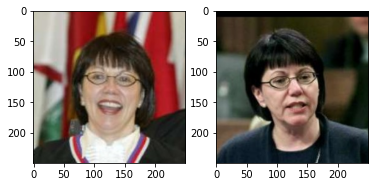

True

In [ ]:
verify(im1,im2)

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

1/1 [==============================] - 1s 664ms/step


Action: gender:  25%|██▌       | 1/4 [00:00<00:02,  1.23it/s]

1/1 [==============================] - 1s 607ms/step


Action: race:  50%|█████     | 2/4 [00:01<00:01,  1.36it/s]  

1/1 [==============================] - 1s 910ms/step


Action: emotion:  75%|███████▌  | 3/4 [00:02<00:01,  1.02s/it]

1/1 [==============================] - 0s 20ms/step


Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


(33, 'Woman', 'asian', 'sad')

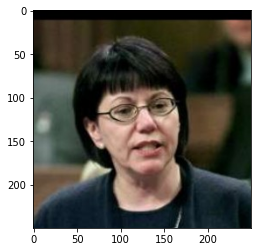

In [ ]:
analyse(im2)

There are  2  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 1s 563ms/step
find function lasts  0.6798896789550781  seconds

Searched through folder: sub/lfw/Angela_Lansbury


'Input label: Anne_McLellan, Found label: None'

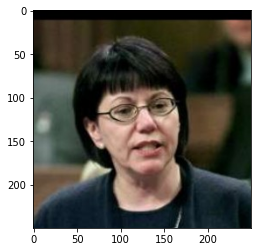

In [ ]:
recognize(im2,imgs)